#  Fraudulent credit card transactions 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 

from sklearn.model_selection import train_test_split

from keras.layers import Dense
from keras.models import Sequential
import tensorflow  as tf

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from keras import backend as K

import tensorflow_addons as tfa

from tensorflow.keras.optimizers import Adam

## Data
*****
- Public data [here](https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv)
- Transactions made by credit cards in September 2013 by European cardholders. 

In [2]:
df = pd.read_csv("../data/creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
values = df["Class"].value_counts()
print(values)

0    284315
1       492
Name: Class, dtype: int64


Text(1.28, 150, '0.002%')

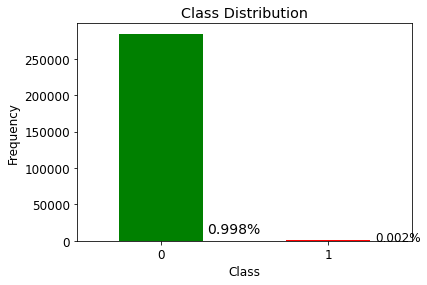

In [5]:
import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)


pd.value_counts(df["Class"]).plot.bar(rot=0, color=["green", "red"])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.text(0.28, 10500,str(round(values[0]/(values[0]+values[1]),3)) + "%", fontsize=14)
plt.text(1.28, 150,  str(round(values[1]/(values[0]+values[1]),3)) + "%", fontsize=12)



In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
def show_history(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure()
    plt.plot(train_loss,'r', label="train")
    plt.plot(val_loss,'g', label="validation")
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()
    
    
def show_metrics(y_pred,th):
    cm = confusion_matrix(y_test, y_pred>th)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    d = classification_report(y_test, y_pred > th,output_dict=True)
    display(pd.DataFrame.from_dict(d))
    return y_pred





In [8]:
y = df["Class"]
y = y.astype(int)
X = df.iloc[:,1:-1]

In [9]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, 
                                                  test_size=0.2, random_state=0)
n_classes = 2

## Using loss function: binaray_cross_entropy

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               9000      
_________________________________________________________________
dense_1 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 74,351
Trainable params: 74,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
4985/4985 [==============================] - 12s 2ms/step - loss: 0.0796 - accuracy: 0.9980 - precision: 0.4

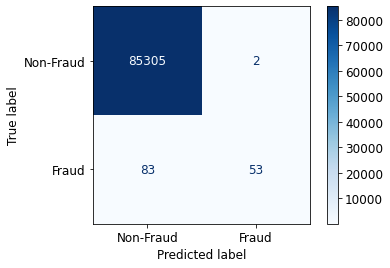

,0,1,accuracy,macro avg,weighted avg
precision,0.999028,0.963636,0.999005,0.981332,0.998972
recall,0.999977,0.389706,0.999005,0.694841,0.999005
f1-score,0.999502,0.554974,0.999005,0.777238,0.998794
support,85307.000000,136.000000,0.999005,85443.000000,85443.000000


array([[1.9342721e-01],
       [7.7118937e-13],
       [8.4702833e-08],
       ...,
       [7.8147082e-07],
       [8.3712229e-07],
       [1.4244358e-06]], dtype=float32)

In [11]:
model = Sequential()
model.add(Dense(300, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(150, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer=Adam(),
               loss='binary_crossentropy',
               metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

history = model.fit(X_train, y_train, epochs=5, 
                    verbose=1,
                    validation_data = (X_val, y_val))


y_pred = model.predict(X_test)
show_metrics(y_pred,.5)

## Using loss function: focal loss 
****

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 300)               9000      
_________________________________________________________________
dense_6 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 74,351
Trainable params: 74,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
4985/4985 [==============================] - 17s 3ms/step - loss: 0.0028 - accuracy: 0.9976 - precision_1:

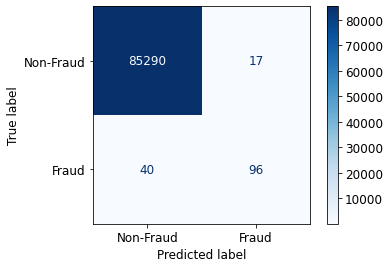

,0,1,accuracy,macro avg,weighted avg
precision,0.999531,0.849558,0.999333,0.924544,0.999293
recall,0.999801,0.705882,0.999333,0.852842,0.999333
f1-score,0.999666,0.771084,0.999333,0.885375,0.999302
support,85307.000000,136.000000,0.999333,85443.000000,85443.000000


array([[9.951036e-01],
       [0.000000e+00],
       [8.779113e-10],
       ...,
       [0.000000e+00],
       [3.618598e-04],
       [6.656317e-05]], dtype=float32)

In [12]:
model2 = Sequential()
model2.add(Dense(300, input_shape=(X_train.shape[1],), activation='relu'))
model2.add(Dense(150, activation = "relu"))
model2.add(Dense(100, activation = "relu"))
model2.add(Dense(50, activation = "relu"))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

model2.compile(optimizer=Adam(),
               loss=tfa.losses.SigmoidFocalCrossEntropy(alpha=0.15, gamma=1.8, from_logits=False),
               metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
 
history2 = model2.fit(X_train, y_train, epochs=5, 
                    verbose=1,
                    validation_data = (X_val, y_val))

y_pred2 = model2.predict(X_test)
print(y_pred2)
show_metrics(y_pred2,.5)